# Problem Set 9
## Ying Sun

In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import uniform as sp_uniform
from scipy.stats import randint as sp_randint
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings("ignore")

## 1. Neural network horse race

In [2]:
df = pd.read_csv('data/strongdrink.txt')
df.head(5)

,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### (a) 

<IPython.core.display.Javascript object>


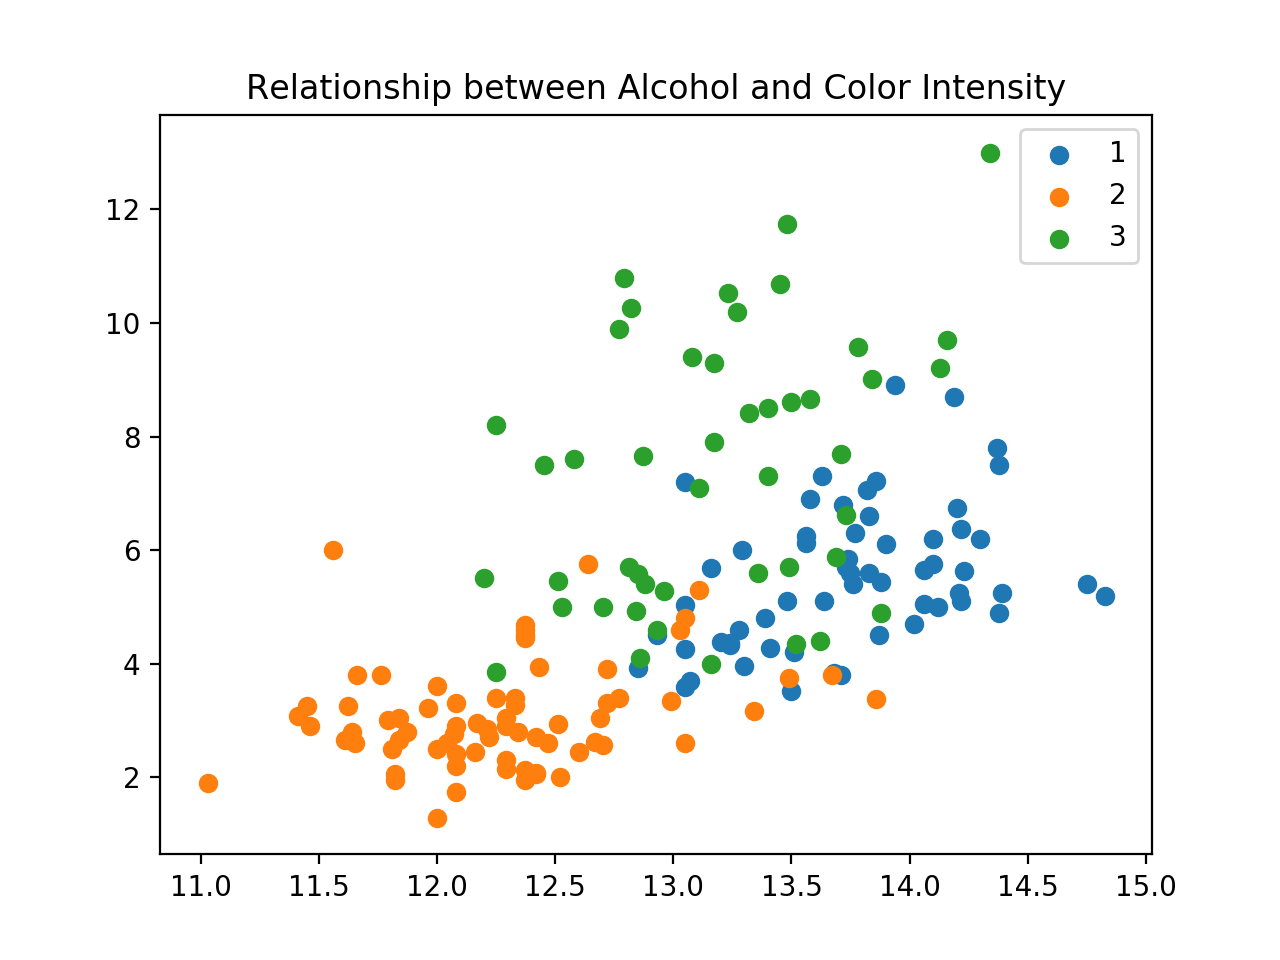

Text(0.5, 1.0, 'Relationship between Alcohol and Color Intensity')

In [3]:
%matplotlib notebook

for cultivar, group in df.groupby(['cultivar']):
    plt.scatter(group['alco'], group['color_int'],label=cultivar)
plt.legend()
plt.title('Relationship between Alcohol and Color Intensity')

### (b)

In [4]:
X = df[['alco','malic','tot_phen','color_int']]
y = df['cultivar']
LR = LogisticRegression()
param_dist1 = {'penalty': ['l1', 'l2'], 'C': sp_uniform(0.1, 10.0)}
rscv_lr = RandomizedSearchCV(LR, param_dist1, 
            n_iter=200, n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error')
lr = rscv_lr.fit(X, y)
print('Optimal tuning parameter values:\n', lr.best_params_)
print('MSE of the optimal results:', abs(lr.best_score_))

Optimal tuning parameter values:
 {'C': 2.665871587495725, 'penalty': 'l1'}
MSE of the optimal results: 0.11931818181818182


### (c) 

In [5]:
param_dist2 = {'n_estimators': sp_randint(10, 200),
               'max_depth': sp_randint(2, 4),
               'min_samples_split': sp_randint(2, 20),
               'min_samples_leaf': sp_randint(2, 20),
               'max_features': sp_randint(1, 4)}
RFC = RandomForestClassifier()
rscv_rf = RandomizedSearchCV(RFC, param_dist2, 
         n_iter=200, n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error')

rf = rscv_rf.fit(X, y)
print('Optimal tuning parameter values:\n', rf.best_params_)
print('MSE of the optimal results:', abs(rf.best_score_))

Optimal tuning parameter values:
 {'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 6, 'min_samples_split': 9, 'n_estimators': 117}
MSE of the optimal results: 0.13068181818181818


### (d) 

In [6]:
param_dist3 = {'C': sp_uniform(loc=0.1, scale=10.0),
               'gamma': ['scale', 'auto'],
               'shrinking': [True, False]}
svc = SVC(kernel='rbf')
rscv_SVC = RandomizedSearchCV(svc, param_dist3, 
        n_iter=200, n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error')
random_SVC = rscv_SVC.fit(X, y)
print('Optimal tuning parameter values:\n', random_SVC.best_params_)
print('MSE of the optimal results:', abs(random_SVC.best_score_))

Optimal tuning parameter values:
 {'C': 3.3605112613782553, 'gamma': 'scale', 'shrinking': True}
MSE of the optimal results: 0.14772727272727273


### (e) 

In [7]:
param_dist4 = {'hidden_layer_sizes': sp_randint(1, 100),
               'activation': ['logistic', 'relu'],
               'alpha': sp_uniform(0.1, 10.0)}
mlp = MLPClassifier(activation='tanh', solver='lbfgs', alpha=0.1)
rscv_MLP = RandomizedSearchCV(mlp, param_dist4, 
        n_iter=200, n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error')
random_MLP = rscv_MLP.fit(X, y)
print('Optimal tuning parameter values:\n', random_MLP.best_params_)
print('MSE of the optimal results:', abs(random_MLP.best_score_))

Optimal tuning parameter values:
 {'activation': 'relu', 'alpha': 1.3288603382412356, 'hidden_layer_sizes': 98}
MSE of the optimal results: 0.08522727272727272


### (f)

Among all the methods above, the best predictor of cultivar is multiple hidden layer neural network model since the MSE of the model is the smallest.